### Q4. a) Generate two clusters of data points with 100 points each (so that the total data size is n = 200), by sampling from Gaussian distributions centered at (0.5, 0.5) and (−0.5, −0.5).

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### For d=2

In [117]:
gd1 = [0.5,0.5]                             #Centered at (0.5,0.5)
gd2 = [-0.5,-0.5]                           #Centered at (-0.5,-0.5)
cov = [[0.05,0],[0,0.05]]                  #Generating covariance

##### yi = ±1 depending on the cluster they originated from
##### However, labels y =1 and y = 0 work better in this scenario

In [119]:
cluster1 = np.random.multivariate_normal(gd1, cov, 100)  #Generating  100 random points  
a = np.insert(cluster1, 2, 1, axis=1)                  #y=1

cluster2 = np.random.multivariate_normal(gd2, cov, 100)  #Generating 100 random points whose mean lies at (-0.5,-0.5)
b = np.insert(cluster2, 2, 0, axis=1)                    #y=-1


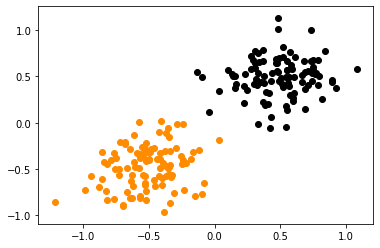

In [122]:
plt.scatter(cluster1[:,0],cluster1[:,1], color='black')
plt.scatter(cluster2[:,0],cluster2[:,1],color='darkorange')

In [123]:
dataset = np.concatenate((a,b))

In [124]:
dataset

array([[ 0.27979915,  0.5738538 ,  1.        ],
       [ 0.75242816,  0.67175178,  1.        ],
       [ 0.59895864,  0.23575459,  1.        ],
       [ 0.50244111,  0.47802528,  1.        ],
       [ 0.66232331,  0.43969656,  1.        ],
       [ 0.51715205,  0.38894151,  1.        ],
       [ 0.68796347,  0.15232462,  1.        ],
       [ 0.31612854,  0.47350306,  1.        ],
       [ 0.71112559,  0.55952551,  1.        ],
       [ 0.32902664,  0.53104918,  1.        ],
       [ 0.483401  ,  1.13455905,  1.        ],
       [ 0.78299843,  0.67285508,  1.        ],
       [ 0.66579233,  0.51900313,  1.        ],
       [ 0.37237581,  0.42613454,  1.        ],
       [ 0.3107752 ,  0.76857237,  1.        ],
       [ 0.69145516,  0.54769661,  1.        ],
       [-0.04623175,  0.11530064,  1.        ],
       [ 0.55437357,  0.56771756,  1.        ],
       [ 0.50915506,  0.41440314,  1.        ],
       [ 1.08255494,  0.58111704,  1.        ],
       [ 0.56325864,  0.49589437,  1.   

### b) (Derive your own GD routines; do not use sklearn functions here.) Train a logistic regression model that tries to minimize loss function L(w) using Gradient Descent (GD). Plot the decay of the training loss function as a function of number of iterations.

Splitting the data in an 80-20 split as training and testing data

In [140]:
X = dataset[:,:-1]
y = dataset[:,-1]

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:,np.newaxis] 

w = np.zeros((X.shape[1],1))
X.shape

(200, 3)

#### Defining Sigmoid function h(z)

In [128]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [129]:
def compute_z(w, x):                  
    return np.dot(x,w)

In [130]:
def hz(w, x):
    return sigmoid(compute_z(w, x))

$ 𝐿(𝑤)=\frac{1}{𝑛}(−𝑦𝑙𝑜𝑔(ℎ𝑧)−(1−𝑦)𝑙𝑜𝑔(1−ℎ𝑧) $

In [131]:
def cost_function(w, x, y):             #L(w) for Logistic Regression
    n = x.shape[0]
    total_cost = -(1 / n) * np.sum(y * np.log(hz(w, x)) + (1 - y) * np.log(1 - hz(w, x)))
    return total_cost

In [132]:
def gradient(w, x, y):                  #Compute gradient
    n = x.shape[0]
    return (1 / n) * np.dot(x.T, sigmoid(compute_z(w,   x)) - y)

In [275]:
def gradient_descent(X, y, w, T, alpha):    #Update the weights or w's according to the slope at current point
    cost = np.zeros(T)
    for i in range(T):
        
        grad = gradient(w,X,y)
        w = w - alpha*grad                 #update values of weights
        cost[i] = cost_function(w,X,y)
    return w,cost

#### Gradient Descent

In [255]:
alpha = 0.99
T = 500

In [277]:
optimum_w_gd,cost = gradient_descent(X,y,w,T,alpha)
final_cost = cost_function(optimum_w_gd,X,y)

In [278]:
final_cost

0.015647471739687467

In [279]:
#final values of w
optimum_w_gd

array([[0.02885511],
       [6.23947606],
       [6.07747237]])

Text(0.5, 1.0, 'Gradient Descent: Error vs. Training Epoch')

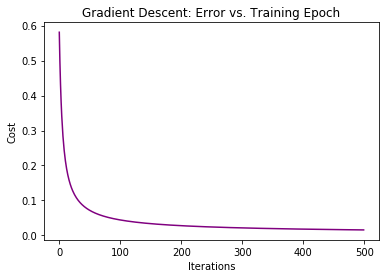

In [281]:

plt.plot(np.arange(T), cost, 'purple')  
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Gradient Descent: Error vs. Training Epoch') 

Gradient Descent plot should show faster rate of convergence than SGD. Let us see.

#### Regression Line

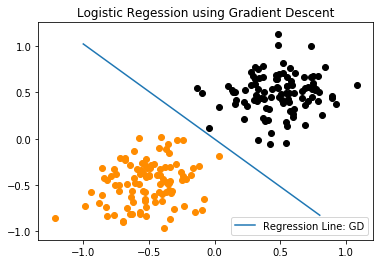

In [287]:
plt.scatter(cluster1[:,0],cluster1[:,1],color='black')         #regression line
plt.scatter(cluster2[:,0],cluster2[:,1],color='darkorange')

xplot_gd = np.arange(-1, 1, 0.2)

yplot_gd = -(optimum_w_gd[0] + optimum_w_gd[1] * xplot_gd)/optimum_w_gd[2]
plt.plot(xplot_gd,yplot_gd,label='Regression Line: GD')
plt.title('Logistic Regession using Gradient Descent',c='k')
plt.legend()
plt.show()

### c) Train the same logistic regression model, but this time using Stochastic Gradient Descent(SGD). Demonstrate that SGD exhibits a slower rate of convergence than GD, but is faster per-iteration, and does not suffer in terms of final quality. You may have to play around a bit with the step-size parameters as well as mini-batch sizes to get reasonable answers.

##### Training the same logistic regression algorithm with SGD to show that SGD has a slower rate of convergence but converges faster per iteration. Randomize the dataset for SGD to converge a little faster

In [288]:
def next_batch(X, y, batch_size):                          #Running SGD
    for i in np.arange(0, X.shape[0], batch_size):
        yield (X[i:i + batch_size], y[i:i + batch_size])

In [289]:
def SGD(X, y, w, T, alpha, batch_size):           #Updating the weights 
    cost = []
    for i in range(T):
        #calculate the gradient at current point
        for (batch_X,batch_Y) in next_batch(X, y, batch_size):
            loss = []
            grad = gradient(w,batch_X,batch_Y)
            
            w = w - alpha*grad
            l = cost_function(w,X,y)
            
            loss.append(l)
        
        cost.append(np.average(loss))
    return w,cost

### Stochiastic Gradient Descent

In [292]:
alpha_sgd = 0.99        #learning rate
T_sgd = 500             #Number of epochs/iterations
batch_size = 1000       #Batch size
w = np.zeros((X.shape[1],1))

optimum_w_sgd,cost_sgd = SGD(X,y,w,T_sgd,alpha_sgd,batch_size)

final_cost_sgd = cost_function(optimum_w_sgd,X,y)

Text(0.5, 1.0, 'Stochastic Gradient Descent: Error vs. Training Epoch')

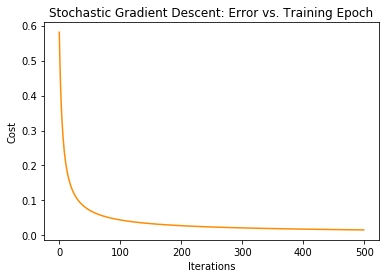

In [293]:
fig, ax = plt.subplots()  
ax.plot(np.arange(T_sgd), cost_sgd, 'darkorange')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Stochastic Gradient Descent: Error vs. Training Epoch') 

Although not a huge difference, we can see SGD going a little slow

### d) Overlay the original plot of data points on the 2D data plane with the two (final) models that you obtained above in parts b and c to visualize correctness of your implementation.

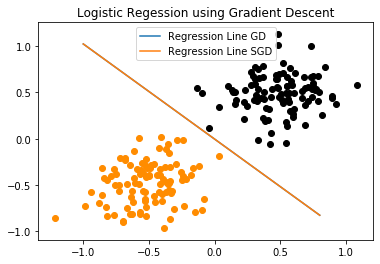

[0]
[[0.02885511]
 [6.23947606]
 [6.07747237]]


In [270]:
#plotting decision boundary
plt.scatter(cluster1[:,0],cluster1[:,1], color='black')
plt.scatter(cluster2[:,0],cluster2[:,1],color='darkorange')


x_vals_gd = np.arange(-1, 1, 0.2)

#For Gradient Descent
y_vals_gd = -(w_star_gd[0] + w_star_gd[1] * x_vals_gd)/w_star_gd[2]
plt.plot(x_vals_gd,y_vals_gd,label='Regression Line GD')
plt.title('Logistic Regession using Gradient Descent',c='k')

#For Stochastic Gradient Descent
y_vals_sgd = -(w_star_sgd[0] + w_star_sgd[1] * x_vals_gd)/w_star_sgd[2]
plt.plot(x_vals_gd, y_vals_sgd, label='Regression Line SGD')
plt.title('Logistic Regession using Gradient Descent',c='k')

plt.legend()
plt.show()

print(w_star)

print(w_star_sgd)